In [30]:
from mxnet import autograd as ag
from mxnet import gluon
from mxnet import ndarray as nd

%matplotlib inline
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 120
from matplotlib import pyplot as plt


num_train = 100
num_test = 100
true_w = [1.2, -3.4, 5.6]
true_b = 5.0

x = nd.random_normal(shape=(num_train+num_test, 1))
x_ = nd.concat(x, nd.power(x, 2), nd.power(x, 3))
y = true_w[0] * x_[:, 0] + true_w[1] * x_[:,1] + true_w[2] * x_[:, 2] + true_b
y += .1 * nd.random.normal(shape=y.shape)
y_train, y_test = y[:num_train], y[num_train:]

In [31]:
def test(net, x, y):
    return square_loss(net(x), y).mean().asscalar()

def train(x_train, x_test, y_train, y_test):
    net = gluon.nn.Sequential()
    with net.name_scope():
        net.add(gluon.nn.Dense(1))
    net.initialize()
    learning_rate = .01
    epochs = 100
    batch_size = 1
    dataset_train = gluon.data.ArrayDataset(x_train, y_train)
    data_iter_train = gluon.data.DataLoader(dataset_train, batch_size, shuffle=True)
    trainer = gluon.Trainer(net.collect_params(), 'sgd', {'learning_rate': learning_rate})
    square_loss = gluon.loss.L2Loss()
    train_loss = []
    test_loss = []
    for e in range(epochs):
        for data, label in data_iter_train:
            with ag.record():
                output = net(data)
                loss = square_loss(output, label)
            loss.backward()
            trainer.step(batch_size)
        train_loss.append(square_loss(net(x_train), y_train).mean().asscalar())
        test_loss.append(square_loss(net(x_test), y_test).mean().asscalar())
    plt.plot(train_loss)
    plt.plot(test_loss)
    plt.legend(['train', 'test'])
    plt.show()
    return ('learned weight', net[0].weight.data(), 'learned bias', net[0].bias.data())

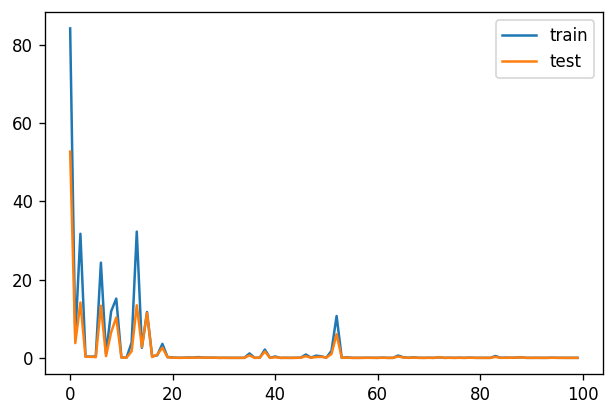

('learned weight', 
 [[ 1.1905508 -3.399188   5.603515 ]]
 <NDArray 1x3 @cpu(0)>, 'learned bias', 
 [5.0109453]
 <NDArray 1 @cpu(0)>)

In [32]:
train(x_[:num_train, :], x_[num_train:, :], y[:num_train], y[num_train:]) # 正常情况

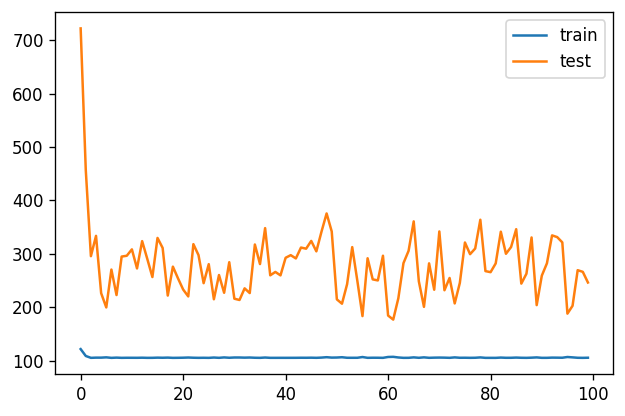

('learned weight', 
 [[21.697926]]
 <NDArray 1x1 @cpu(0)>, 'learned bias', 
 [2.0725882]
 <NDArray 1 @cpu(0)>)

In [33]:
# 欠拟合
train(x[:num_train,:], x[num_train,:], y[:num_train], y[num_train:])

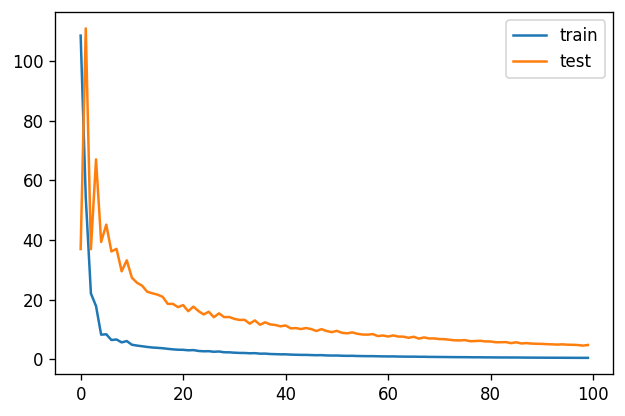

('learned weight', 
 [[ 2.874219  -2.0661695  4.7851787]]
 <NDArray 1x3 @cpu(0)>, 'learned bias', 
 [3.4419851]
 <NDArray 1 @cpu(0)>)

In [34]:
# 过拟合，训练不够
train(x_[0:5, :], x_[num_train:, :], y[0:5], y[num_train:])